In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/TechLabsGroupProject

/content/drive/MyDrive/TechLabsGroupProject


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Use pandas to import the csv file generated using a python script. This csv has information on public repositories from the GitHub API. 

In [120]:
df = pd.read_csv('gitHubAPIResults2.csv')

Look at the number of columns and rows (shape) and the first 5 entries (head).

In [121]:
df.shape

(991, 83)

In [122]:
df.head()

,id,node_id,name,full_name,private,owner,html_url,description,fork,url,keys_url,archive_url,assignees_url,blobs_url,branches_url,collaborators_url,comments_url,commits_url,compare_url,contents_url,contributors_url,deployments_url,downloads_url,assignees_url.1,branches_url.1,events_url,forks_url,git_commits_url,git_refs_url,git_tags_url,git_url,issue_comment_url,issue_events_url,issues_url,keys_url.1,labels_url,languages_url,merges_url,milestones_url,notifications_url,...,stargazers_url,statuses_url,subscribers_url,subscription_url,tags_url,teams_url,trees_url,clone_url,mirror_url,hooks_url,svn_url,homepage,language,forks,forks_count,stargazers_count,watchers_count,watchers,size,default_branch,open_issues,open_issues_count,allow_forking,is_template,license,topics,has_issues,has_projects,has_wiki,has_pages,has_downloads,archived,disabled,visibility,pushed_at,created_at,updated_at,permissions,score,template_repository
0,99826556,MDEwOlJlcG9zaXRvcnk5OTgyNjU1Ng==,scottyjs,stojanovic/scottyjs,False,"{'login': 'stojanovic', 'id': 613478, 'node_id...",https://github.com/stojanovic/scottyjs,Deploy static websites and single page apps to...,False,https://api.github.com/repos/stojanovic/scottyjs,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,git://github.com/stojanovic/scottyjs.git,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://api.github.com/repos/stojanovic/scotty...,https://github.com/stojanovic/scottyjs.git,NaN,https://api.github.com/repos/stojanovic/scotty...,https://github.com/stojanovic/scottyjs,http://medium.com/@slobodan/single-command-dep...,JavaScript,36,36,713,713,713,6602,master,12,12,True,False,"{'key': 'mit', 'name': 'MIT License', 'spdx_id...","['aws-s3', 'deployment', 'static-site']",True,True,True,False,True,True,False,public,2021-07-16T14:19:19Z,2017-08-09T15:54:30Z,2021-07-16T14:19:53Z,"{'admin': False, 'maintain': False, 'push': Fa...",1.0,NaN
1,119603782,MDEwOlJlcG9zaXRvcnkxMTk2MDM3ODI=,react-contextual,drcmda/react-contextual,False,"{'login': 'drcmda', 'id': 2223602, 'node_id': ...",https://github.com/drcmda/react-contextual,🚀 react-contextual is a small (less than 1KB) ...,False,https://api.github.com/repos/drcmda/react-cont...,https://api.github.com/repos/drcmda/react-cont...,https://api.github.com/repos/drcmda/react-cont...,https://api.github.com/repos/drcmda/react-cont...,htt

Start to clean the data. Remove the unnecessary columns.

In [123]:
df.columns

Index(['id', 'node_id', 'name', 'full_name', 'private', 'owner', 'html_url',
       'description', 'fork', 'url', 'keys_url', 'archive_url',
       'assignees_url', 'blobs_url', 'branches_url', 'collaborators_url',
       'comments_url', 'commits_url', 'compare_url', 'contents_url',
       'contributors_url', 'deployments_url', 'downloads_url',
       'assignees_url.1', 'branches_url.1', 'events_url', 'forks_url',
       'git_commits_url', 'git_refs_url', 'git_tags_url', 'git_url',
       'issue_comment_url', 'issue_events_url', 'issues_url', 'keys_url.1',
       'labels_url', 'languages_url', 'merges_url', 'milestones_url',
       'notifications_url', 'pulls_url', 'releases_url', 'ssh_url',
       'stargazers_url', 'statuses_url', 'subscribers_url', 'subscription_url',
       'tags_url', 'teams_url', 'trees_url', 'clone_url', 'mirror_url',
       'hooks_url', 'svn_url', 'homepage', 'language', 'forks', 'forks_count',
       'stargazers_count', 'watchers_count', 'watchers', 'size',
   

In [124]:
columns_to_keep = ['id', 'name', 'language', 'forks_count', 'stargazers_count', 'watchers_count', 'watchers', 'created_at']
for column_name in df.columns:
  if column_name not in columns_to_keep:
    df.drop(columns=column_name, inplace=True)

df.columns

Index(['id', 'name', 'language', 'forks_count', 'stargazers_count',
       'watchers_count', 'watchers', 'created_at'],
      dtype='object')

Due to how the data was fetched there is a "header" row every 30 entries that must be removed.

In [125]:
df.head(32)

,id,name,language,forks_count,stargazers_count,watchers_count,watchers,created_at
0,99826556,scottyjs,JavaScript,36,713,713,713,2017-08-09T15:54:30Z
1,119603782,react-contextual,JavaScript,31,646,646,646,2018-01-30T22:41:23Z
2,92927457,alm,PHP,10,636,636,636,2017-05-31T09:10:08Z
3,141927393,unswitch,JavaScript,13,575,575,575,2018-07-22T20:12:08Z
4,135647632,lumin,JavaScript,21,545,545,545,2018-06-01T00:15:32Z
5,95385096,repatch,TypeScript,12,515,515,515,2017-06-25T20:50:11Z
6,77769343,RxFingerPrinter,Java,78,511,511,511,2017-01-01T07:07:12Z
7,93019977,iOS11AdaptationTips,NaN,51,486,486,486,2017-06-01T05:32:13Z
8,175338700,60-and-90-degree-V-Groove-Bit,C++,1,476,476,476,2019-03-13T03:21:39Z
9,190217270,3-Bit-CNC-Starter-Pack,NaN,1,472,472,472,2019-06-04T14:24:04Z


In [126]:
filt = df['id'] == 'id'
df.drop(index=df[filt].index, inplace=True)

df.head(32)

,id,name,language,forks_count,stargazers_count,watchers_count,watchers,created_at
0,99826556,scottyjs,JavaScript,36,713,713,713,2017-08-09T15:54:30Z
1,119603782,react-contextual,JavaScript,31,646,646,646,2018-01-30T22:41:23Z
2,92927457,alm,PHP,10,636,636,636,2017-05-31T09:10:08Z
3,141927393,unswitch,JavaScript,13,575,575,575,2018-07-22T20:12:08Z
4,135647632,lumin,JavaScript,21,545,545,545,2018-06-01T00:15:32Z
5,95385096,repatch,TypeScript,12,515,515,515,2017-06-25T20:50:11Z
6,77769343,RxFingerPrinter,Java,78,511,511,511,2017-01-01T07:07:12Z
7,93019977,iOS11AdaptationTips,NaN,51,486,486,486,2017-06-01T05:32:13Z
8,175338700,60-and-90-degree-V-Groove-Bit,C++,1,476,476,476,2019-03-13T03:21:39Z
9,190217270,3-Bit-CNC-Starter-Pack,NaN,1,472,472,472,2019-06-04T14:24:04Z


Check the current shape of the dataframe now that the unnecessary rows and columns are removed.

In [127]:
df.shape

(960, 8)

For this project I will be looking only at data that has a valid entry for languages. Filter out repos that have NaN. 

In [128]:
df.dropna(subset = ['language'], inplace=True)
df.shape

(887, 8)

Only looking at the following languages: Python, JavaScript, Java, C#, C, C++, Swift, PHP, Typescript, and Kotlin. Filter out all other languages

In [129]:
languages = ['Python', 'JavaScript', 'Java', 'C#', 'C', 'C++', 'Swift', 'PHP', 'TypeScript', 'Kotlin']
filt_languages = df['language'].isin(languages)
df_languages = df.loc[filt_languages]
df_languages.shape

(626, 8)

Check that the types of each column will work for future analysis. 

In [130]:
df_languages.dtypes

id                  object
name                object
language            object
forks_count         object
stargazers_count    object
watchers_count      object
watchers            object
created_at          object
dtype: object

It is discovered that the fork_count, stargazer_count, watchers_count, watchers are all type object. To carry out future work with these entries they must be converted to numeric values.

In [131]:
pd.options.mode.chained_assignment = None
df_languages[['forks_count', 'stargazers_count', 'watchers_count', 'watchers']] = df_languages[['forks_count', 'stargazers_count', 'watchers_count', 'watchers']].apply(pd.to_numeric)
df_languages['year'] = df_languages['created_at'].apply(lambda x: int(x.split('-')[0]))



In [132]:
df_languages.dtypes

id                  object
name                object
language            object
forks_count          int64
stargazers_count     int64
watchers_count       int64
watchers             int64
created_at          object
year                 int64
dtype: object

Take a look at the current cleaned dataframe to be used for all further analysis.

In [134]:
df_languages.head()

,id,name,language,forks_count,stargazers_count,watchers_count,watchers,created_at,year
0,99826556,scottyjs,JavaScript,36,713,713,713,2017-08-09T15:54:30Z,2017
1,119603782,react-contextual,JavaScript,31,646,646,646,2018-01-30T22:41:23Z,2018
2,92927457,alm,PHP,10,636,636,636,2017-05-31T09:10:08Z,2017
3,141927393,unswitch,JavaScript,13,575,575,575,2018-07-22T20:12:08Z,2018
4,135647632,lumin,JavaScript,21,545,545,545,2018-06-01T00:15:32Z,2018


A quick look at the overall populartiy of each language using the three metrics (stargazer_count, fokers_count, watchers_count). Start by grouping on each language type.

In [145]:
df_grouped_languages = df_languages.groupby(['language'])
df_grouped_languages.get_group('JavaScript')

,id,name,language,forks_count,stargazers_count,watchers_count,watchers,created_at,year
0,99826556,scottyjs,JavaScript,36,713,713,713,2017-08-09T15:54:30Z,2017
1,119603782,react-contextual,JavaScript,31,646,646,646,2018-01-30T22:41:23Z,2018
3,141927393,unswitch,JavaScript,13,575,575,575,2018-07-22T20:12:08Z,2018
4,135647632,lumin,JavaScript,21,545,545,545,2018-06-01T00:15:32Z,2018
12,100926932,mark,JavaScript,15,450,450,450,2017-08-21T07:48:33Z,2017
...,...,...,...,...,...,...,...,...,...
972,118920527,parcel-plugin-imagemin,JavaScript,7,129,129,129,2018-01-25T14:07:24Z,2018
982,154707013,react-hooks-and-suspense-egghead-playlist,JavaScript,8,128,128,128,2018-10-25T16:55:56Z,2018
986,81481231,the-rusty-web,JavaScript,4,128,128,128,2017-02-09T18:26:03Z,2017
988,133179734,musicman,JavaScript,22,128,128,128,2018-05-12T20:09:34Z,2018


Now see how many entries exist in the data set for each language type. This is a count of how many repositories exist for each language from 2017-2021 (in the sampled data). Use `.size` to get the number of repositories in each language. Convert this to a dataframe, set up the columns with the labels 'language' and 'repository_count', and sort the values. Display the results in a bar chart.

In [136]:
df_language_count = df_grouped_languages.size().to_frame()
df_language_count['language'] = df_language_count.index
df_language_count.rename(columns={0: 'repository_count'}, inplace=True)
df_language_count.sort_values('repository_count', inplace=True)
df_language_count

,repository_count,language
language,,
C#,7,C#
Kotlin,20,Kotlin
C,21,C
C++,22,C++
TypeScript,33,TypeScript
PHP,34,PHP
Swift,34,Swift
Java,106,Java
Python,110,Python


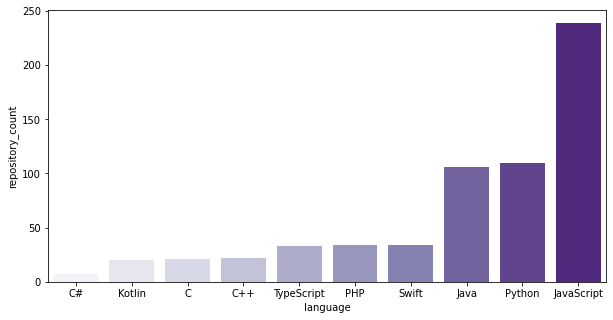

In [137]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'language', y = 'repository_count', data = df_language_count, palette = 'Purples')

plt.show()

In the data set JavaScript is by far the most popular coding language overall. It is followed by Java and Python which are almost equal. Likewise PHP, Swift, TypeSCript are almost equal. C++, C, and Kotlin, are next at almost equal levels. Finally C# is the least popular overall language in the data set. 